In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("clean_df.csv")
df.head()

,Unnamed: 0,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
df = df.drop([11239],axis=0).reset_index()

In [6]:
df = df.drop(['index'],axis=1)

In [7]:
X = df.drop('FraudFound_P',axis=1)
y = df['FraudFound_P']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
# spliting numerical set
X_train_num=X_train.select_dtypes(np.number)
X_test_num=X_test.select_dtypes(np.number)

In [10]:
# spliting categorical set
X_train_cat=X_train.select_dtypes(object)
X_test_cat=X_test.select_dtypes(object)

In [11]:
# starting to take care of numerical
X_train_num.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
9351,2,4,62,9353,7,400,2,1995
9390,4,4,25,9392,11,400,3,1995
3832,4,4,66,3834,2,400,1,1994
6054,1,1,62,6056,13,400,2,1994
1414,1,2,36,1415,11,400,2,1994


In [12]:
X_train_num.nunique()    #age looks continuous, the others discrete

WeekOfMonth               5
WeekOfMonthClaimed        5
Age                      65
PolicyNumber          11563
RepNumber                16
Deductible                4
DriverRating              4
Year                      3
dtype: int64

In [13]:
X_train_num.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,11563.000000,11563.000000,11563.000000,11563.000000,11563.000000,11563.000000,11563.000000,11563.000000
mean,2.793393,2.695408,40.558246,7716.796506,8.469601,407.593185,2.492260,1994.867768
std,1.290841,1.257643,12.197169,4448.392928,4.599588,43.614299,1.119254,0.802544
min,1.000000,1.000000,16.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3860.500000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7742.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11573.500000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15419.000000,16.000000,700.000000,4.000000,1996.000000


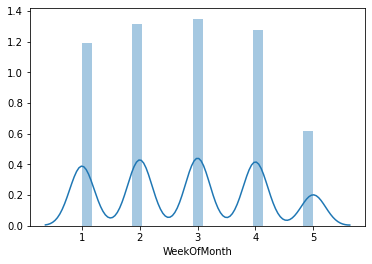

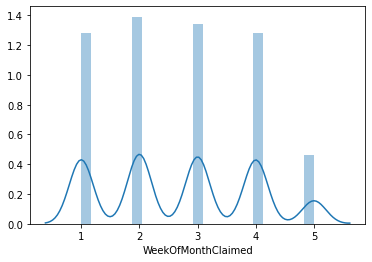

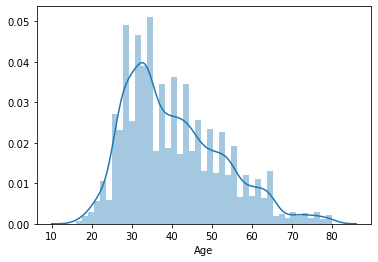

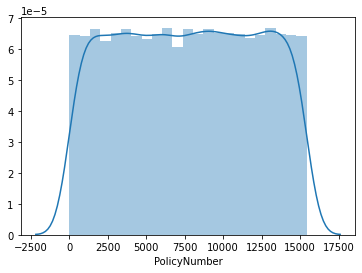

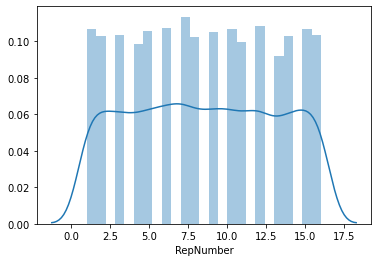

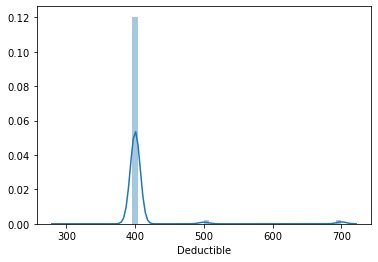

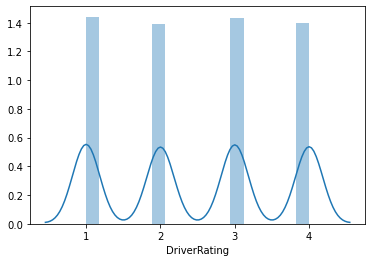

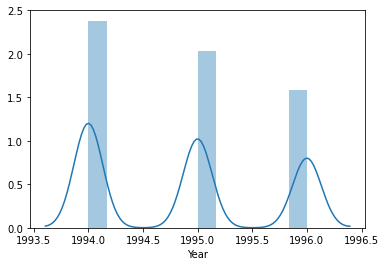

In [14]:
for column in X_train_num:
    sns.distplot(X_train_num[column])
    plt.show()

In [15]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num))     
#we are using standart scaling (and not minmax) to be able to see the outliers better
#when we look at max compared to std we can see them 


#how we scale?
# 1. we fit x train 
# 2. transform train
# 3. transform test without re fitting it!!

In [16]:
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num))   #here we are not fitting the test!

In [17]:
pd.DataFrame(X_train_num_scaled).head()

,0,1,2,3,4,5,6,7
0,-0.614659,1.037376,1.758005,0.367835,-0.319521,-0.174106,-0.439830,0.164773
1,0.934786,1.037376,-1.275617,0.376603,0.550160,-0.174106,0.453661,0.164773
2,0.934786,1.037376,2.085964,-0.872892,-1.406622,-0.174106,-1.333321,-1.081318
3,-1.389381,-1.348142,1.758005,-0.373364,0.985000,-0.174106,-0.439830,-1.081318
4,-1.389381,-0.552969,-0.373730,-1.416707,0.550160,-0.174106,-0.439830,-1.081318


In [18]:
pd.DataFrame(X_test_num_scaled).head()

,0,1,2,3,4,5,6,7
0,-0.614659,-0.552969,-1.111638,1.676004,1.419841,-0.174106,-0.439830,1.410865
1,0.160063,1.037376,0.118209,-0.989118,-0.536941,-0.174106,1.347152,-1.081318
2,1.709508,1.832548,-1.111638,-0.780270,0.550160,-0.174106,-1.333321,-1.081318
3,-1.389381,-1.348142,-0.783679,-0.532529,-1.406622,-0.174106,0.453661,-1.081318
4,-0.614659,-0.552969,-0.619699,1.565173,0.115319,-0.174106,0.453661,1.410865


In [19]:
#starting to work with categorical:
X_train_cat.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
9351,Apr,Tuesday,Toyota,Urban,Friday,Apr,Male,Married,Policy Holder,Sedan - All Perils,...,2 to 4,more than 7,51 to 65,No,No,External,3 to 5,no change,1 vehicle,All Perils
9390,Jul,Thursday,Honda,Urban,Thursday,Jul,Female,Single,Policy Holder,Sedan - Collision,...,1,5 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,Collision
3832,May,Saturday,Pontiac,Urban,Thursday,May,Male,Single,Policy Holder,Sedan - All Perils,...,1,more than 7,over 65,No,No,External,3 to 5,no change,1 vehicle,All Perils
6054,Nov,Tuesday,Ford,Urban,Wednesday,Nov,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,more than 7,51 to 65,No,No,External,more than 5,no change,1 vehicle,Liability
1414,Jan,Thursday,Mazda,Urban,Tuesday,Jan,Male,Married,Policy Holder,Utility - All Perils,...,2 to 4,6 years,36 to 40,No,No,External,none,no change,1 vehicle,All Perils


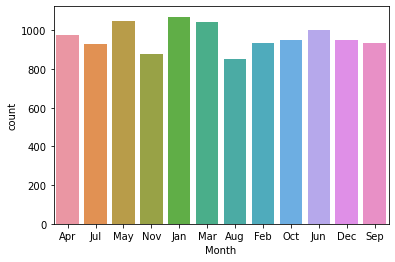

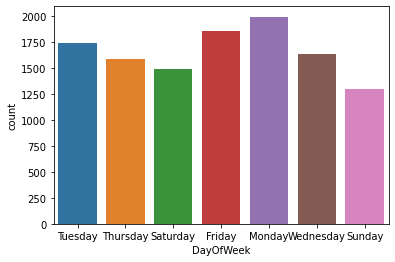

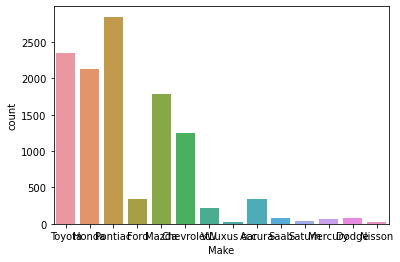

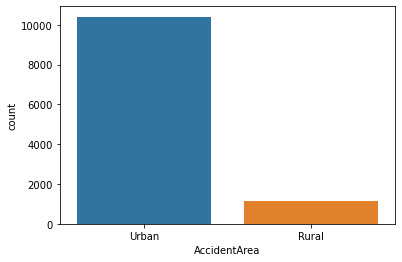

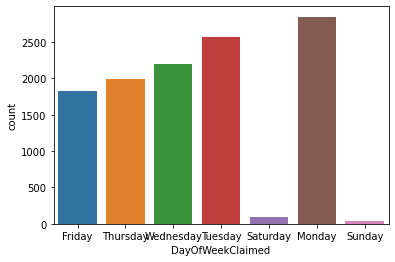

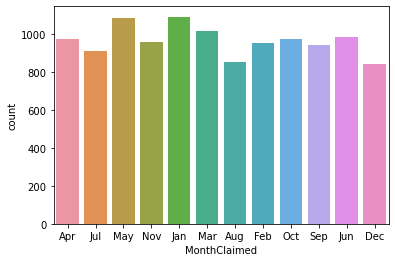

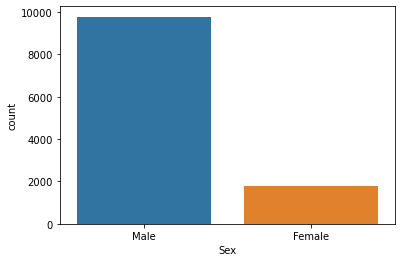

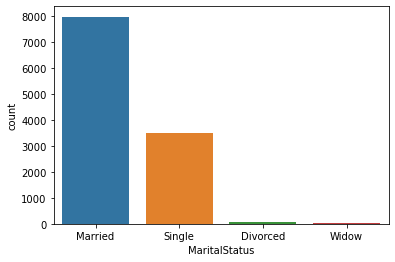

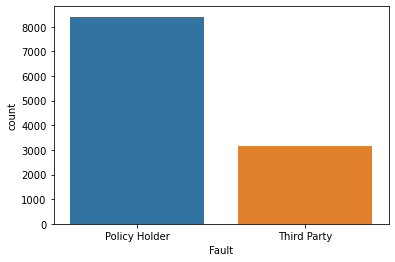

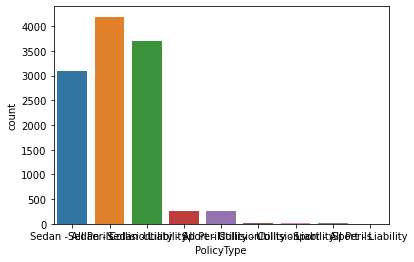

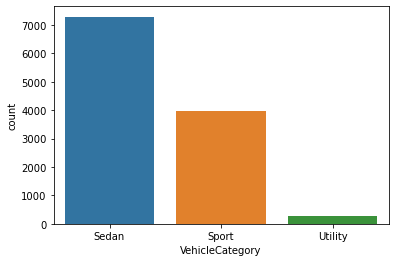

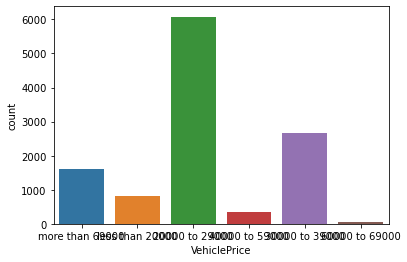

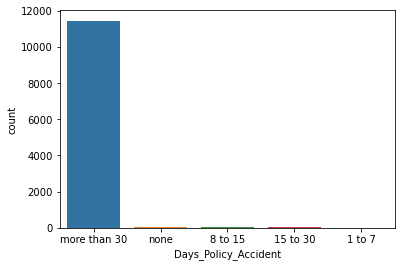

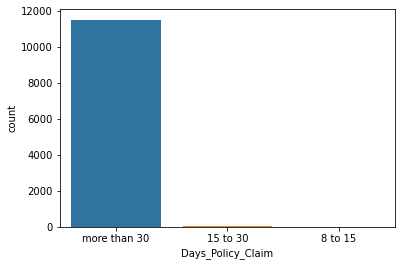

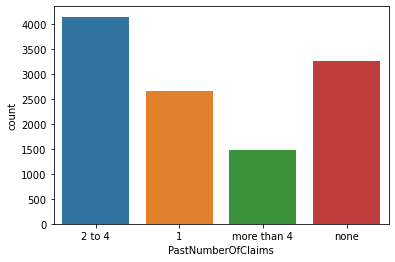

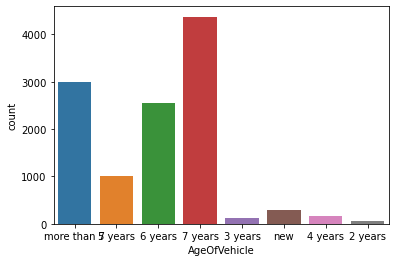

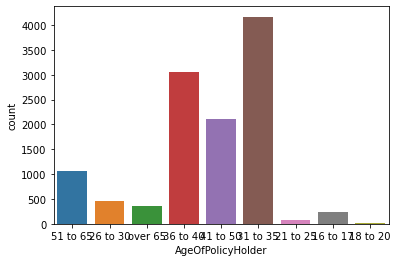

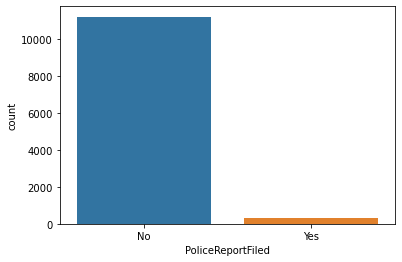

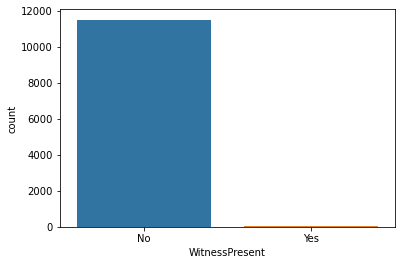

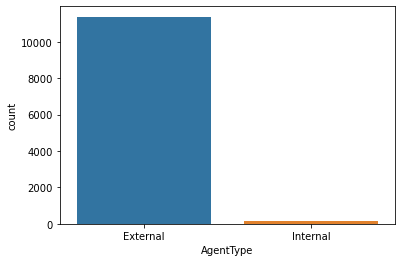

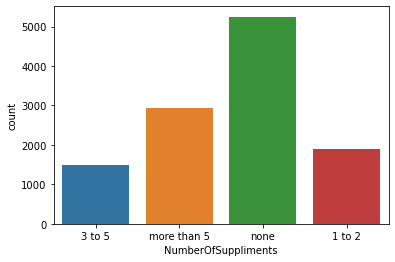

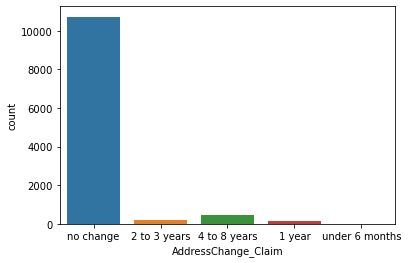

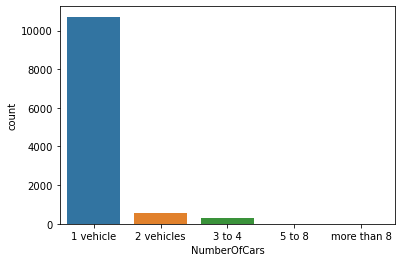

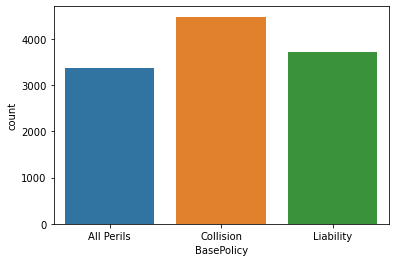

In [20]:
def count_plot(df):
    for column in df.columns:
        sns.countplot(x=X_train_cat[column])
        plt.show()
    return None
count_plot(X_train_cat)

In [21]:
## conclusions:
#### Month - Onehot encoding
#### DayOfWeek - Onehot encoding
#### Make - Onehot encoding
#### AccidentArea - Onehot encoding
#### DayOfWeekClaimed - Onehot encoding
#### MonthClaimed - Onehot encoding
#### Sex - Onehot encoding
#### MaritalStatus - Onehot encoding
#### Fault - Onehot encoding
#### PolicyType - Onehot encoding
#### VehicleCategory - Onehot encoding
#### VehiclePrice - Ordinal
#### Days_Policy_Accident - Onehot encoding
#### Days_Policy_Claim - Onehot encoding
#### PastNumberOfClaims - Ordinal encoding
#### AgeOfVehicle - Ordinal encoding
#### AgeOfPolicyHolder - Ordinal encoding
#### PoliceReportFiled - Onehot encoding
#### WitnessPresent - Onehot encoding
#### AgentType - Onehot encoding
#### NumberOfSuppliments - Ordinal encoding
#### AddressChange_Claim - Ordinal encoding
#### NumberOfCars - Ordinal encoding
#### BasePolicy - Ordinal encoding

In [22]:
# columns to ordinal encode:
X_train_cat_ordinal = X_train_cat[['VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','BasePolicy']]

In [23]:
X_test_cat_ordinal = X_test_cat[['VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','BasePolicy']]

In [24]:
X_train_cat_ordinal.head()

,VehiclePrice,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
9351,more than 69000,2 to 4,more than 7,51 to 65,3 to 5,no change,1 vehicle,All Perils
9390,less than 20000,1,5 years,26 to 30,3 to 5,no change,1 vehicle,Collision
3832,20000 to 29000,1,more than 7,over 65,3 to 5,no change,1 vehicle,All Perils
6054,more than 69000,more than 4,more than 7,51 to 65,more than 5,no change,1 vehicle,Liability
1414,more than 69000,2 to 4,6 years,36 to 40,none,no change,1 vehicle,All Perils


In [25]:
# ordinal encoding for columns:
# 'VehiclePrice','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments','AddressChange_Claim',
# 'NumberOfCars','BasePolicy'
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_train_cat_ordinal_encoded = pd.DataFrame(encoder.fit_transform(X_train_cat_ordinal))

In [26]:
X_test_cat_ordinal_encoded = pd.DataFrame(encoder.transform(X_test_cat_ordinal))

In [27]:
X_test_cat_ordinal_encoded

,0,1,2,3,4,5,6,7
0,0.0,1.0,5.0,4.0,0.0,3.0,0.0,1.0
1,0.0,1.0,5.0,5.0,2.0,3.0,0.0,1.0
2,0.0,2.0,3.0,4.0,3.0,3.0,0.0,1.0
3,4.0,1.0,5.0,4.0,0.0,3.0,0.0,2.0
4,5.0,1.0,7.0,0.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...
3850,2.0,3.0,5.0,5.0,3.0,2.0,1.0,0.0
3851,0.0,0.0,5.0,5.0,3.0,3.0,0.0,0.0
3852,0.0,1.0,4.0,4.0,3.0,3.0,0.0,1.0
3853,0.0,0.0,4.0,4.0,3.0,3.0,0.0,2.0


In [28]:
# Onehot encoding 

In [29]:
X_train_cat_hot = X_train_cat[['Month','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','Sex','MaritalStatus','Fault','PolicyType','VehicleCategory','Days_Policy_Accident','Days_Policy_Claim','AgentType','PoliceReportFiled','WitnessPresent']]

In [30]:
X_test_cat_hot = X_test_cat[['Month','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','Sex','MaritalStatus','Fault','PolicyType','VehicleCategory','Days_Policy_Accident','Days_Policy_Claim','AgentType','PoliceReportFiled','WitnessPresent']]

In [31]:
X_train_cat_hot.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,Days_Policy_Accident,Days_Policy_Claim,AgentType,PoliceReportFiled,WitnessPresent
9351,Apr,Tuesday,Toyota,Urban,Friday,Apr,Male,Married,Policy Holder,Sedan - All Perils,Sedan,more than 30,more than 30,External,No,No
9390,Jul,Thursday,Honda,Urban,Thursday,Jul,Female,Single,Policy Holder,Sedan - Collision,Sedan,more than 30,more than 30,External,No,No
3832,May,Saturday,Pontiac,Urban,Thursday,May,Male,Single,Policy Holder,Sedan - All Perils,Sedan,more than 30,more than 30,External,No,No
6054,Nov,Tuesday,Ford,Urban,Wednesday,Nov,Male,Married,Policy Holder,Sedan - Liability,Sport,more than 30,more than 30,External,No,No
1414,Jan,Thursday,Mazda,Urban,Tuesday,Jan,Male,Married,Policy Holder,Utility - All Perils,Utility,more than 30,more than 30,External,No,No


In [32]:
X_test_cat_hot.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,Days_Policy_Accident,Days_Policy_Claim,AgentType,PoliceReportFiled,WitnessPresent
15169,Jun,Thursday,Honda,Urban,Thursday,Jun,Male,Single,Third Party,Sedan - Collision,Sedan,more than 30,more than 30,Internal,No,No
3315,May,Wednesday,Honda,Urban,Monday,May,Male,Married,Third Party,Sedan - Collision,Sedan,more than 30,more than 30,External,No,No
4244,Mar,Thursday,Mazda,Urban,Thursday,Mar,Female,Single,Policy Holder,Sedan - Collision,Sedan,more than 30,more than 30,External,No,No
5346,Feb,Tuesday,Pontiac,Urban,Tuesday,Feb,Female,Married,Policy Holder,Sedan - Liability,Sport,more than 30,more than 30,External,No,No
14676,Mar,Friday,Honda,Urban,Friday,Mar,Male,Single,Policy Holder,Sedan - Liability,Sport,more than 30,more than 30,Internal,No,No


In [33]:
X_test_cat_hot[X_test_cat_hot['PolicyType']=='Sport - Liability']

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,Days_Policy_Accident,Days_Policy_Claim,AgentType,PoliceReportFiled,WitnessPresent


In [35]:
# X_test_cat_hot=X_test_cat_hot.drop([0],axis=0).reset_index()

In [ ]:
# X_test_cat_hot=X_test_cat_hot.drop(['index'],axis=1)

In [36]:
# Onehot encoding for columns: 'Month','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','Sex',
#  'MaritalStatus','Fault','PolicyType','VehicleCategory','Days_Policy_Accident','Days_Policy_Claim','AgentType'
from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder(drop='first').fit(X_train_cat_hot)
# X_train_cat_hot_encoded = encoder2.fit(X_train_cat_hot)
X_train_cat_hot_encoded = pd.DataFrame(encoder2.transform(X_train_cat_hot).toarray())
# X_train_cat_hot_encoded.head()
encoder2.get_feature_names()
X_train_cat_hot_encoded.columns = encoder2.get_feature_names()


In [37]:
X_train_cat_hot_encoded.head()

,x0_Aug,x0_Dec,x0_Feb,x0_Jan,x0_Jul,x0_Jun,x0_Mar,x0_May,x0_Nov,x0_Oct,...,x10_Utility,x11_15 to 30,x11_8 to 15,x11_more than 30,x11_none,x12_8 to 15,x12_more than 30,x13_Internal,x14_Yes,x15_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
X_test_cat_hot_encoded = pd.DataFrame(encoder2.transform(X_test_cat_hot).toarray())
encoder2.get_feature_names()
X_test_cat_hot_encoded.columns = encoder2.get_feature_names()

In [40]:
X_test_cat_hot['PolicyType'].value_counts()

Sedan - Collision       1370
Sedan - Liability       1264
Sedan - All Perils      1021
Sport - Collision         88
Utility - All Perils      86
Utility - Collision       11
Utility - Liability        7
Sport - All Perils         7
Name: PolicyType, dtype: int64

In [41]:
X_train_cat_hot['PolicyType'].value_counts()    # Sport - Liability exist in the test set but not in the train set
 # so i'm getting an error message. since there is only one I will drop it

Sedan - Collision       4213
Sedan - Liability       3723
Sedan - All Perils      3065
Sport - Collision        260
Utility - All Perils     254
Utility - Collision       19
Sport - All Perils        15
Utility - Liability       14
Name: PolicyType, dtype: int64

In [39]:
X_train_cat_endoded=pd.concat([X_train_cat_ordinal_encoded,X_train_cat_hot_encoded],axis=1)

In [40]:
X_train_cat_endoded

,0,1,2,3,4,5,6,7,x0_Aug,x0_Dec,...,x10_Utility,x11_15 to 30,x11_8 to 15,x11_more than 30,x11_none,x12_8 to 15,x12_more than 30,x13_Internal,x14_Yes,x15_Yes
0,5.0,1.0,6.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.0,0.0,3.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,6.0,8.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.0,2.0,6.0,7.0,2.0,3.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,1.0,4.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11558,1.0,3.0,5.0,5.0,2.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11559,4.0,3.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11560,4.0,0.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11561,0.0,3.0,5.0,4.0,2.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
X_test_cat_ordinal_encoded.reset_index(drop=True,inplace=True)

In [42]:
X_test_cat_hot_encoded.reset_index(drop=True,inplace=True)

In [43]:
X_test_cat_endoded=pd.concat([X_test_cat_ordinal_encoded,X_test_cat_hot_encoded],axis=1)
X_test_cat_endoded.head()

,0,1,2,3,4,5,6,7,x0_Aug,x0_Dec,...,x10_Utility,x11_15 to 30,x11_8 to 15,x11_more than 30,x11_none,x12_8 to 15,x12_more than 30,x13_Internal,x14_Yes,x15_Yes
0,0.0,1.0,5.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,5.0,5.0,2.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,2.0,3.0,4.0,3.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,1.0,5.0,4.0,0.0,3.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,1.0,7.0,0.0,3.0,3.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [44]:
X_test_cat_endoded.isna().sum().sum()

0

In [45]:
X_train_cat_endoded.shape

(11563, 80)

In [46]:
X_train_processed = pd.concat([X_train_num_scaled,X_train_cat_endoded],axis=1)

In [47]:
X_test_processed = pd.concat([X_test_num_scaled,X_test_cat_endoded],axis=1)

In [48]:
X_train_processed.isna().sum().sum()

0

In [49]:
#treat for imbalance:
y_train.value_counts()

0    10859
1      704
Name: FraudFound_P, dtype: int64

In [ ]:
#doesnt work
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=100,k_neighbors=3)
# X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_processed,y_train)

In [50]:
X_train_processed.reset_index(drop=True,inplace=True)

In [51]:
y_train.reset_index(drop=True,inplace=True)

In [53]:
train_set = pd.concat([X_train_processed,y_train], axis=1)

In [54]:
train_set.isna().sum().sum()

0

In [55]:
from sklearn.utils import resample

category_0 = train_set[train_set['FraudFound_P'] == 0]
category_1 = train_set[train_set['FraudFound_P'] == 1]
print(len(category_0))
print(len(category_1))

category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))



10859
704


In [56]:
# and now we have the same shape
print(category_0.shape)
print(category_1_oversampled.shape)

(10859, 89)
(10859, 89)


In [57]:
trainset_new = pd.concat([category_0, category_1_oversampled], axis = 0)
trainset_new = trainset_new.sample(frac =1)  #randomize the rows

In [58]:
# category_0.isna().sum()
category_1_oversampled.isna().sum().sum()

0

In [59]:
trainset_new.isna().sum().sum()

0

In [60]:
X_train = pd.DataFrame(trainset_new.drop(['FraudFound_P'],axis = 1))
y_train = trainset_new['FraudFound_P']

In [61]:
X_train.isna().sum().sum()

0

In [62]:
X_test_processed.isna().sum().sum()

0

In [63]:
y_train.isna().sum().sum()

0

In [64]:
y_test.isna().sum().sum()

0

In [65]:
print(len(X_train))
print(len(y_train))


21718
21718


In [91]:
X_train.to_csv("X_train.csv")
X_train.shape

(21718, 88)

In [92]:
y_train.to_csv("y_train.csv")

In [93]:
X_test_processed.to_csv("X_test.csv")

In [94]:
y_test.to_csv("y_test.csv")

In [97]:
X.to_csv("X.csv")

In [96]:
trainset_new.to_excel("trainset_new.xlsx")

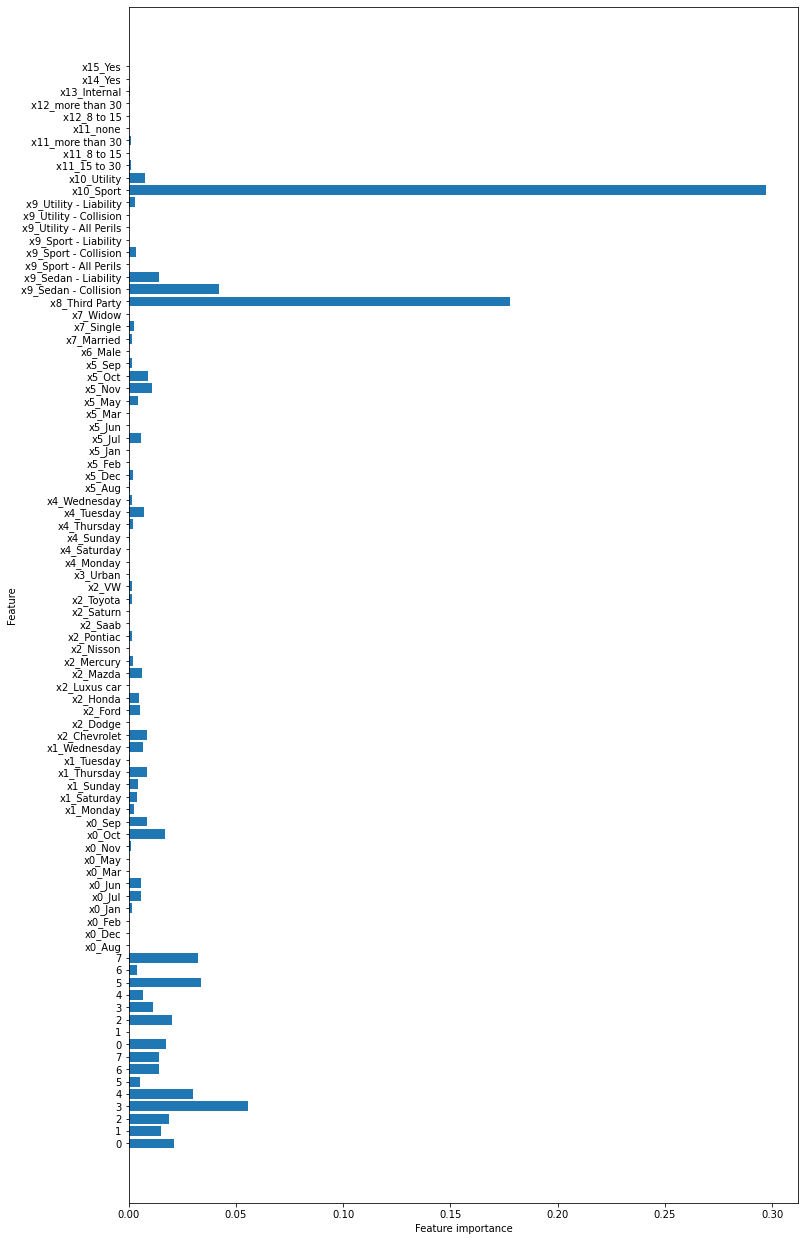

In [89]:
# ploting feature importance to know what effects my model the most

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.rcParams["figure.figsize"] = (20, 42)

plot_feature_importances(model4)
# plot_feature_importances(model4)